In [25]:
import numpy as np
import pandas as pd

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Load the dataset
df = pd.read_csv("extracted_features_charrec.csv")
X = df.drop(columns=['class_name']).to_numpy()
y = df['class_name'].to_numpy()

# Training data
inputs = [[row[1], row[2]] for row in X]
targets = y

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, inputs, targets):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            x1, x2 = inputs[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs, targets)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, inputs, targets):
    correct = 0
    for i in range(len(inputs)):
        x1, x2 = inputs[i]
        target = targets[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")
    accuracy = (correct / len(inputs)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, inputs, targets)

Trained Weights:
W0: 111999314.9999928, W1: 3788105.8290580814, W2: 6171652.347985059

Testing the Trained Perceptron:
Input: (1.5249622e-09, 1.2912236e-34), Target: 3333, Prediction: 1
Input: (1.4100681e-14, 4.2941973e-36), Target: 3333, Prediction: 1
Input: (0.06343618, 3.091646e-12), Target: 3333, Prediction: 1
Input: (2.704598e-11, 2.784285e-29), Target: 3333, Prediction: 1
Input: (0.0014697042, 1.4951021e-15), Target: 3333, Prediction: 1
Input: (3.6995935e-09, 5.8531234e-30), Target: 3333, Prediction: 1
Input: (2.8631529e-12, 2.6238402999999997e-35), Target: 3333, Prediction: 1
Input: (2.8198595e-09, 2.7841696e-28), Target: 3333, Prediction: 1
Input: (3.8128036e-07, 1.4433563999999998e-18), Target: 3333, Prediction: 1
Input: (4.928934e-16, 2.0405802e-37), Target: 3333, Prediction: 1
Input: (9.312064e-17, 1.2016562999999998e-37), Target: 3333, Prediction: 1
Input: (1.7699564e-12, 0.0), Target: 3333, Prediction: 1
Input: (1.7653422e-14, 8.518074e-35), Target: 3333, Prediction: 1
Inp

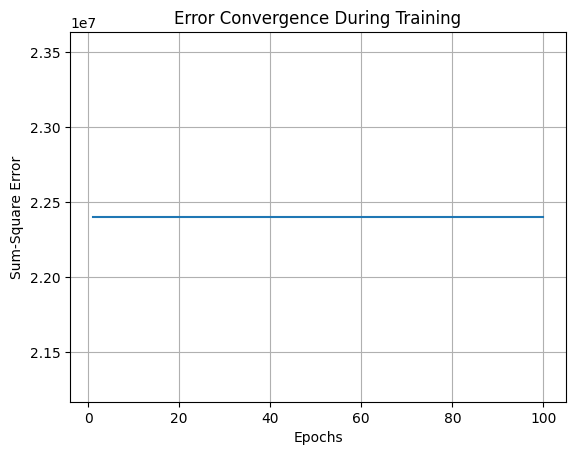

In [26]:
import matplotlib.pyplot
plt.plot(range(1, len(error_values) + 1), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error Convergence During Training')
plt.grid(True)
plt.show()